In [150]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [153]:
#feature selection
df.drop(["Cabin","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [154]:
#removing nan value
df["Age"].fillna(df["Age"].median(),inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

In [155]:
#outlier remover
import seaborn as sns
def outLier_remover(dataset, column,max_quantile,min_quantile):
    max=dataset[column].mean() + max_quantile*dataset[column].std()
    min=dataset[column].mean() - min_quantile*dataset[column].std()
    print("Highest allowed",max)
    print("Lowest allowed",min)


    print("len of outlier",len(dataset[(dataset[column] > max) | (dataset[column] < min)]))
    df= dataset[(dataset[column] < max) & (dataset[column] > min)]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))

    plt.subplot(2,2,2)
    sns.boxplot(dataset[column])

    plt.subplot(2,2,4)
    sns.boxplot(df[column])

    plt.show()

    return df

Highest allowed 381.09676117861676
Lowest allowed -17.74298933585034
len of outlier 3


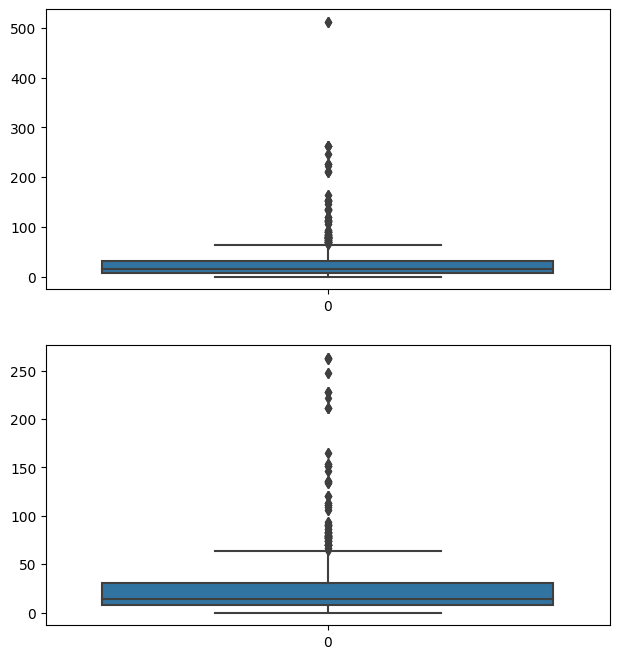

In [158]:
y=outLier_remover(df,"Fare",7,1)
df=y

In [ ]:
# print("Highest allowed",df['Age'].mean() + 3*df['Age'].std())
# print("Lowest allowed",df['Age'].mean() - 2.5*df['Age'].std())

Highest allowed 64.23788997018816
Lowest allowed -1.2611506279985925


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  879 non-null    int64  
 1   Pclass    879 non-null    int64  
 2   Sex       879 non-null    object 
 3   Age       879 non-null    float64
 4   SibSp     879 non-null    int64  
 5   Parch     879 non-null    int64  
 6   Fare      879 non-null    float64
 7   Embarked  879 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.1+ KB


In [160]:
x=df.drop(columns=['Survived'])
y=df["Survived"]
print(x.shape)
print(y.shape)

(879, 7)
(879,)


In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer([
    ('tnf1',OneHotEncoder(sparse=False),['Sex']),
    ('tnf2',OneHotEncoder(sparse=False),['Embarked'])
],remainder='passthrough')

# ohe = OneHotEncoder(sparse=False,dtype=np.int32)
# X_tr= ohe.fit_transform(X_train[['Sex','Embarked']])
# X_tr2=df.drop(columns=["Sex","Embarked"],axis=1)
# X_tr=pd.DataFrame(X_tr)
# print(type(X_tr),type(X_tr2))
# X_train_t=pd.concat([X_tr,X_tr2],axis=1)
# X_train_t

In [207]:
X_train_t=transformer.fit_transform(X_train)
X_test_t=transformer.fit_transform(X_test)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_enc

In [208]:
df2=pd.DataFrame(X_train_t,columns=["male",'female','s','c','q','Pclass','Age','SibSp','Parch','Fare'])
df2_teset=pd.DataFrame(X_test_t,columns=["male",'female','s','c','q','Pclass','Age','SibSp','Parch','Fare'])

In [209]:
#feature selection with corealtion
df2.corr()

,male,female,s,c,q,Pclass,Age,SibSp,Parch,Fare
male,1.000000,-1.000000,0.087410,0.109813,-0.145444,-0.129403,-0.075353,0.103241,0.243440,0.228176
female,-1.000000,1.000000,-0.087410,-0.109813,0.145444,0.129403,0.075353,-0.103241,-0.243440,-0.228176
s,0.087410,-0.087410,1.000000,-0.141684,-0.779750,-0.229953,0.015485,-0.055160,-0.008072,0.253242
c,0.109813,-0.109813,-0.141684,1.000000,-0.509297,0.211256,-0.030941,-0.032364,-0.075174,-0.123037
q,-0.145444,0.145444,-0.779750,-0.509297,1.000000,0.066299,0.006107,0.068424,0.054563,-0.142342
Pclass,-0.129403,0.129403,-0.229953,0.211256,0.066299,1.000000,-0.321800,0.074494,0.015911,-0.604058
Age,-0.075353,0.075353,0.015485,-0.030941,0.006107,-0.321800,1.000000,-0.253104,-0.195301,0.058689
SibSp,0.103241,-0.103241,-0.055160,-0.032364,0.068424,0.074494,-0.253104,1.000000,0.417547,0.222131
Parch,0.243440,-0.243440,-0.008072,-0.075174,0.054563,0.015911,-0.195301,0.417547,1.000000,0.266786
Fare,0.228176,-0.228176,0.253242,-0.123037,-0.142342,-0.604058,0.058689,0.222131,0.266786,1.000000


In [210]:
#with pandas
# df=pd.get_dummies(df,columns=['Embarked','Sex'],dtype=int)
# df

C:\Users\ABC\AppData\Local\Temp\ipykernel_11412\1037831437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df2["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

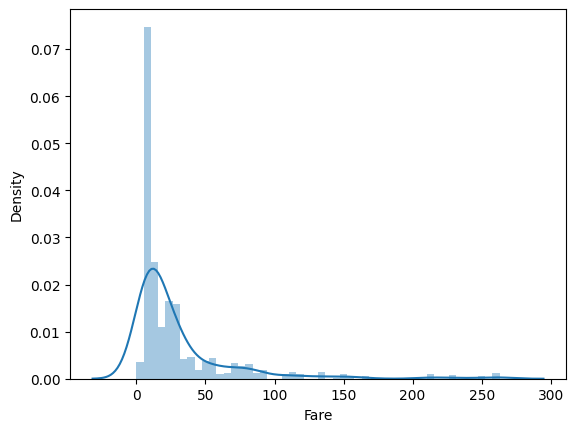

In [213]:
import seaborn as sas
sas.distplot(df2["Fare"])


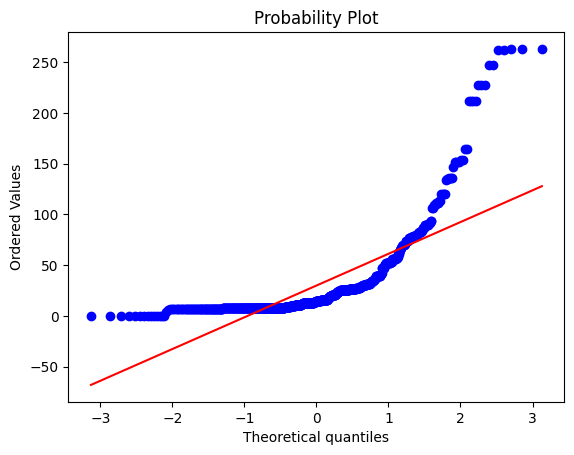

In [214]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df2["Fare"],dist="norm",plot=plt)
plt.show()

In [215]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [ ]:
#function trnsfromer without columns transfer
# ft=FunctionTransformer(func=np.log1p)
# fear=ft.fit_transform(df2['Fare'])
# df2.drop(columns=["Fare"],axis=1,inplace=True)

In [ ]:

# X_train_transformed = pd.concat([df2, fear], axis=1)

In [216]:
#function trnsfromer without columns transfer
transformers=ColumnTransformer([
    ("q1",FunctionTransformer(func=np.log1p),['Fare'])
    ],remainder="passthrough")

X_train_transformed=transformers.fit_transform(df2)
X_tset_transformed=transformers.fit_transform(df2_teset)


In [217]:
df3=pd.DataFrame(X_train_transformed,columns=['Fare',"male",'female','s','c','q','Pclass','Age','SibSp','Parch'])
df3

,Fare,male,female,s,c,q,Pclass,Age,SibSp,Parch
0,2.202765,0.0,1.0,0.0,0.0,1.0,3.0,20.0,0.0,0.0
1,2.188856,1.0,0.0,0.0,0.0,1.0,3.0,23.0,0.0,0.0
2,2.202765,1.0,0.0,0.0,0.0,1.0,3.0,28.0,0.0,0.0
3,2.167143,0.0,1.0,0.0,1.0,0.0,3.0,28.0,0.0,0.0
4,4.368920,1.0,0.0,0.0,0.0,1.0,1.0,51.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
786,2.442347,1.0,0.0,0.0,0.0,1.0,2.0,29.0,0.0,0.0
787,2.359674,1.0,0.0,0.0,0.0,1.0,3.0,63.0,0.0,0.0
788,3.363842,0.0,1.0,0.0,0.0,1.0,3.0,4.0,3.0,2.0
789,2.169054,0.0,1.0,0.0,1.0,0.0,3.0,28.0,0.0,0.0


C:\Users\ABC\AppData\Local\Temp\ipykernel_11412\2963307653.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df2["Fare"])


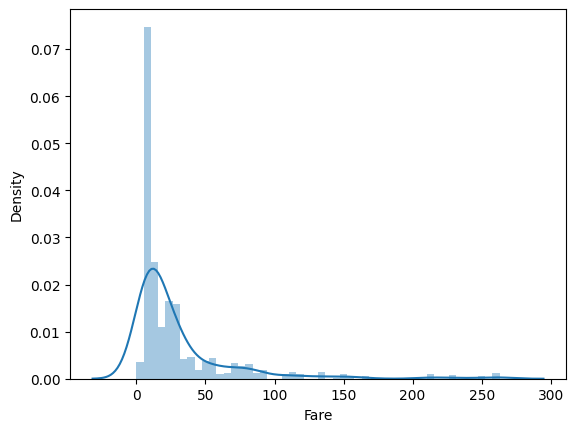

C:\Users\ABC\AppData\Local\Temp\ipykernel_11412\2963307653.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sas.distplot(df3["Fare"])


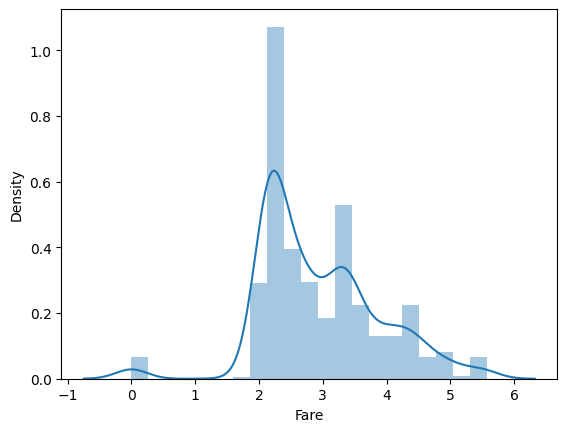

In [218]:

import matplotlib.pyplot as plt
import seaborn as sas
a=X_train_t
sas.distplot(df2["Fare"])
plt.show()


import seaborn as sas
a=X_train_t
sas.distplot(df3["Fare"])
plt.show()


In [219]:
#Imbalancing data
y_train=pd.DataFrame(y_train)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(X_train_transformed)
train_data1 = X_train_transformed.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(X_train_transformed, y_train)



In [220]:
print(train_data2.shape)
print(train_labels2.shape)

(982, 10)
(982, 1)


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [222]:
model.fit(train_data2,train_labels2)


c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [223]:
y_pred = model.predict(X_tset_transformed)

In [202]:
y_test

413    0
689    1
702    0
90     0
639    0
      ..
553    1
471    0
717    1
3      1
20     0
Name: Survived, Length: 88, dtype: int64

In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8295454545454546

In [226]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']